Last exploratory plot for the China rainfall paper. Creates a seasonal six-panel plot of banded rainfall fraction, as a potential alternative way of showing information in the paper, and also for my own purpose. May also try to do a Hovmoller plot of banded fraction just to see what it ends up looking like.


In [1]:
import itertools
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import time
import os
from shutil import copy

%matplotlib inline

In [2]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin"
rdapath = "APHRO_ZH_front_025deg_V1101."

In [3]:
## start by loading all precipitation data for each year.
P = np.zeros((365,80,72,57))
P_band = np.zeros((365,80,72,57))
P_local = np.zeros((365,80,72,57))

for yr in range(1951,2008):
    
    #Build filename
    filename = ferretpath + '/' + rdapath + str(yr) + '.nc'
    print(filename),
    myf = nc.Dataset(filename, 'r')
    
    #Obtain fraction of different types of rainfall
    P[:,:,:,yr-1951] = myf['P'][:365,:,:]
    P_band[:,:,:,yr-1951] = myf['P_band1'][:365,:,:] + myf['P_band2'][:365,:,:]
    P_local[:,:,:,yr-1951] = myf['P_leftover'][:365,:,:]
    
    myf.close()
    
P_tuple = (P,P_band,P_local)
P_mean = [ np.mean(P_type, axis=3) for P_type in P_tuple ]

/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1951.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1952.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1953.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1954.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1955.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1956.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1957.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1958.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1959.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1960.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1961.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1962.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1963.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1964.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_0

(80, 72)
(80, 72)
(80, 72)
(80, 72)
(80, 72)
(80, 72)
Overwriting existing version of file in RDA manuscript directory...
Overwriting existing version of file in RDA Python directory...


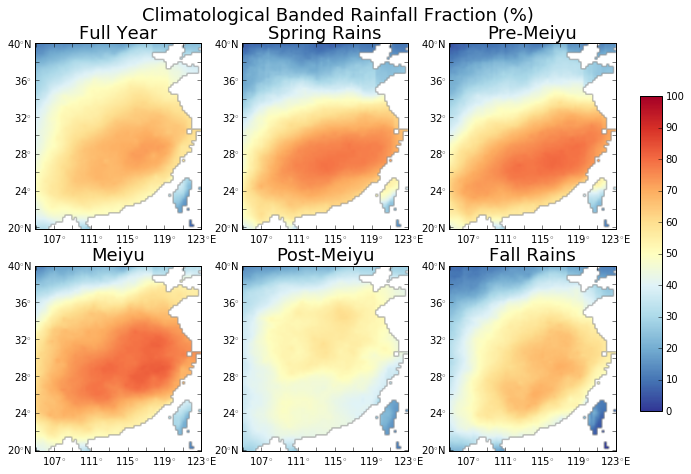

In [16]:
## PLOTTING - 6-panel climatological figure of banded rainfall fraction for whole
## year, and also for different seasons.

## arrange for plotting below
seasons = [[1,365],[81,120],[121,160],[161,200],[201,273],[274,320]]
my_palette = ''


## create one big figure behind subpanels
fig, axes = plt.subplots(2,3,figsize=(10,7.3), facecolor='w')

## lists of the characteristics for each subplot - what column is being plotted, title and labels.
#mets = ['M_1','M_2','M_3','M_4','M_5','M_6','M_7','M_8']
titles = ["Full Year","Spring Rains","Pre-Meiyu","Meiyu","Post-Meiyu","Fall Rains"]
#xlabels = ['','','','','','','Day of Year','Day of Year']
ylabels = ["Full year","","","Pre-Meiyu","","","Meiyu","","","Post-Meiyu","",""]

## change x-axis and y-axis tick marks to be correct
xtickpos = np.linspace(0,72,10)
ytickpos = np.linspace(0,80,11)
xticklabels = ["","107$\!^\circ$","","111$\!^\circ$","","115$\!^\circ$","","119$\!^\circ$","","123$\!^\circ\!$E"]
yticklabels = ["20$\!^\circ\!$N","","24$\!^\circ$","","28$\!^\circ$","","32$\!^\circ$","","36$\!^\circ$","","40$\!^\circ\!$N"]


for ax, season, title, ylabel in zip(axes.reshape(-1), seasons, titles, ylabels):
    plt.sca(ax)
    total_mean = np.mean(P_mean[0][season[0]-1:season[1],:,:], axis=0)
    banded_mean = np.mean(P_mean[1][season[0]-1:season[1],:,:], axis=0)
    banded_frac = 100*banded_mean/total_mean
    print(banded_frac.shape)

    im = plt.imshow(banded_frac, origin = 'lower', vmax=100, vmin=0, cmap = 'RdYlBu_r')
    ax.set_title(title, fontsize=18)
    ax.set_xticks(xtickpos)
    ax.set_xticklabels(xticklabels)
    ax.set_yticks(ytickpos)
    ax.set_yticklabels(yticklabels)
    ax.tick_params(axis='y', which='major', pad=2)


fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.97, 0.2, 0.03, 0.6])
cb = fig.colorbar(im, cax=cbar_ax, orientation='vertical')

st = plt.suptitle("Climatological Banded Rainfall Fraction (%)", size = 18, y=.97, x=.55)


## SAVE COPIES OF FIGURE TO MANUSCRIPT AND ANALYSIS DIRECTORIES
figure_name = "banded_frac_climo_test.pdf"

savepath = "/Users/Siwen/Desktop/RDA/Figures/" + figure_name

if os.path.exists(savepath):
    print("Overwriting existing version of file in RDA manuscript directory...")
    os.remove(savepath)
    
plt.savefig(savepath)
    
copypath = "/Users/Siwen/RDA/Figures/" + figure_name
    
if os.path.exists(copypath):
    print("Overwriting existing version of file in RDA Python directory...")
    os.remove(copypath)
    
copy(savepath,copypath)

plt.savefig(savepath, bbox_inches='tight')